In [2]:
import pandas


In [3]:
from yahist import Hist1D,Hist2D
from yahist.utils import plot_stack
import numpy as np
import json

%pylab inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import mplhep
plt.style.use(mplhep.style.CMS)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
import awkward

In [5]:
import pyarrow

In [6]:
df = pandas.read_pickle('../output/higgsDNA_ttHKillED_ttHH_ptmgg_mass.pkl')
df1 = pandas.read_pickle('../output/higgsDNA_ttH_ttHH_ptmgg_mass_REFERENCE.pkl')
df2 = pandas.read_pickle('../output/higgsDNA_ttHH_ptmgg.pkl')


In [12]:
ak = awkward.from_arrow(pyarrow.Table.from_pandas(df))

In [66]:
ak['ttH_killer']
ak['mva_score']

SR1_cut = ak["mva_score"] >= 0.9975
ak_SR1 = ak[SR1_cut]

signalbb = ak_SR1["process_id"] ==11
signaltt = ak_SR1["process_id"] ==12 
signalww = ak_SR1["process_id"] ==13
signal_filter =  signalbb | signaltt | signalww
signal = ak_SR1[signal_filter]
bkg_filter = ak_SR1["process_id"] ==10
bkg = ak_SR1[bkg_filter]
nonres_filter= ~signal_filter & ~bkg_filter

In [71]:
nonres = ak_SR1[nonres_filter]
print(sum(nonres_filter) , " " , sum(bkg_filter), " " , sum(signal_filter) , " " , len(ak_SR1)  )

109529   3555   436353   549437


In [86]:
109529  + 3555 +  436353 ==  549437


signal["weight_central"]

pre_signalbb = ak["process_id"] ==11
pre_signaltt = ak["process_id"] ==12 
pre_signalww = ak["process_id"] ==13
pre_signal_filter = pre_signalbb | pre_signaltt | pre_signalww
pre_bkg_filter = ak["process_id"] ==10
pre_nonres_filter= ~pre_signal_filter & ~pre_bkg_filter

pre_signal = ak[pre_signal_filter]
pre_bkg = ak[pre_bkg_filter]
pre_nonres = ak[pre_nonres_filter]



In [88]:
print(len(pre_signal), " ",len(signal))

3746181   436353


In [97]:
hist = Hist1D( signal["ttH_killer"].to_numpy(allow_missing=True),weights=signal["weight_central"] , bins=np.linspace(0,1,50), label="ttHH")
hist2 = Hist1D( bkg["ttH_killer"].to_numpy(allow_missing=True),weights=bkg["weight_central"] , bins=np.linspace(0,1,50), label="ttH")
hist3 = Hist1D( nonres["ttH_killer"].to_numpy(allow_missing=True),weights=nonres["weight_central"] , bins=np.linspace(0,1,50), label="other")

<AxesSubplot:>

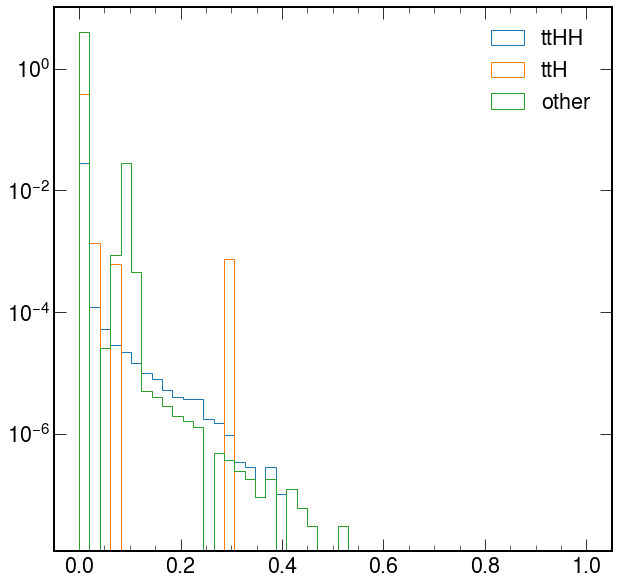

In [98]:
hist.plot(log=True)
hist2.plot(log=True)
hist3.plot(log=True)

<AxesSubplot:>

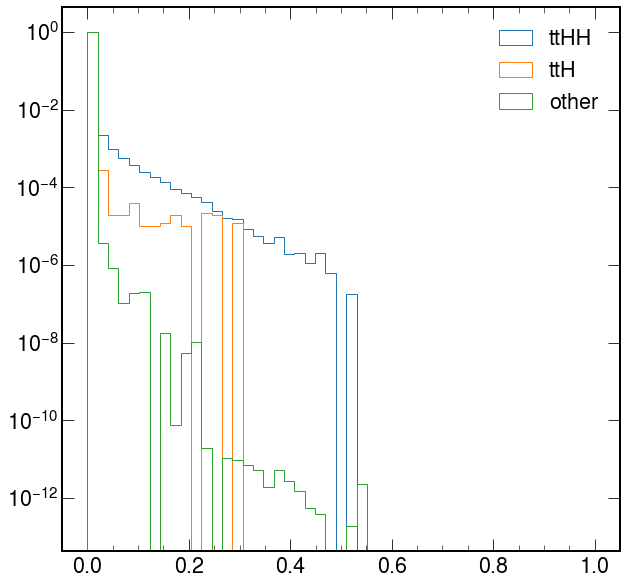

In [96]:
pre_hist = Hist1D( pre_signal["ttH_killer"].to_numpy(allow_missing=True),weights=pre_signal["weight_central"] , bins=np.linspace(0,1,50),label="ttHH")
pre_hist2 = Hist1D( pre_bkg["ttH_killer"].to_numpy(allow_missing=True),weights=pre_bkg["weight_central"] , bins=np.linspace(0,1,50),label="ttH")
pre_hist3 = Hist1D( pre_nonres["ttH_killer"].to_numpy(allow_missing=True),weights=pre_nonres["weight_central"] , bins=np.linspace(0,1,50),label="other")

pre_hist.normalize().plot(log=True)
pre_hist2.normalize().plot(log=True)
pre_hist3.normalize().plot(log=True)



<AxesSubplot:>

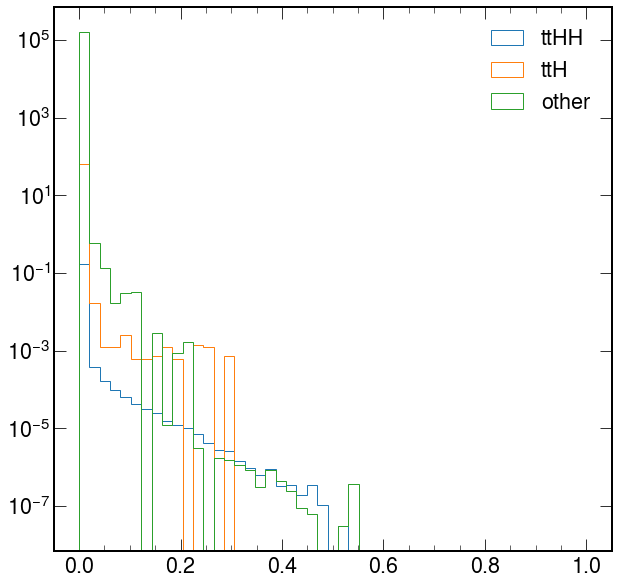

In [99]:
pre_hist.plot(log=True)
pre_hist2.plot(log=True)
pre_hist3.plot(log=True)


In [7]:
akNew = awkward.from_arrow(pyarrow.Table.from_pandas(df1))
akOld = awkward.from_arrow(pyarrow.Table.from_pandas(df2))

len(akNew)

7623850

In [8]:
pre_new = Hist1D( akNew["mva_score"].to_numpy(allow_missing=True),weights=akNew["weight_central"] , bins=np.linspace(0,1,50),label="New")
pre_old = Hist1D( akOld ["mva_score"].to_numpy(allow_missing=True),weights=akOld["weight_central"] , bins=np.linspace(0,1,50),label="Old")

<AxesSubplot:>

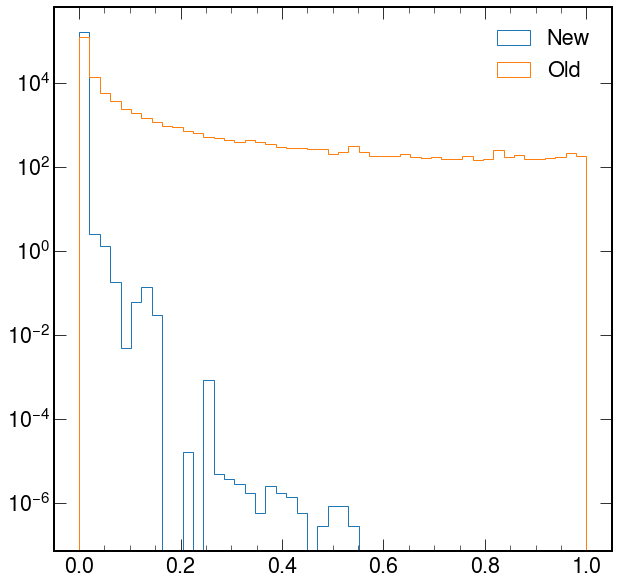

In [9]:
pre_new.plot(log=True)
pre_old.plot(log=True)